# 기본 데이터처리 및 시각화 관련 패키지 로딩
## 아나콘다 환경: 연구원 - tf37

In [1]:
import os
import pandas as pd
import numpy as np
from simpledbf import Dbf5
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

from tqdm import tqdm
import time
%matplotlib inline

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [2]:
from osgeo import gdal

In [3]:
import rasterio

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'age_탐방속도_탐반시간.csv',
 'all_gps_survey_2021.cpg',
 'all_gps_survey_2021.dbf',
 'all_gps_survey_2021.prj',
 'all_gps_survey_2021.sbn',
 'all_gps_survey_2021.sbx',
 'all_gps_survey_2021.shp',
 'all_gps_survey_2021.shp.xml',
 'all_gps_survey_2021.shx',
 'all_gps_survey_2021_parkzone_out_final.cpg',
 'all_gps_survey_2021_parkzone_out_final.dbf',
 'all_gps_survey_2021_parkzone_out_final.prj',
 'all_gps_survey_2021_parkzone_out_final.sbn',
 'all_gps_survey_2021_parkzone_out_final.sbx',
 'all_gps_survey_2021_parkzone_out_final.shp',
 'all_gps_survey_2021_parkzone_out_final.shp.xml',
 'all_gps_survey_2021_parkzone_out_final.shx',
 'all_gps_survey_2021_parkzone_out_final_question_matching.cpg',
 'all_gps_survey_2021_parkzone_out_final_question_matching.dbf',
 'all_gps_survey_2021_question_matching.cpg',
 'all_gps_survey_2021_question_matching.dbf',
 'cm.png',
 'data',
 'df_final.csv',
 'env14_data',
 'env_df.csv',
 'example-total.tif',
 'final_data',
 'final_data_2021.csv

In [6]:
df = pd.read_csv("./data/hotspot_env13_for_randomforest_2021.csv")
df.head()

,SOURCE_ID,JOIN_COUNT,GiZScore,GiPValue,NNeighbors,Gi_Bin,ORIG_FID,viewpoint,infodesk,landscape,office,outground,park,toliet,disater,culture,wetland,dem,slope,aspect,Label
0,1,332,4.649520,0.000003,32,3,0,2166.33,1015.970,114.018,988.838,3420.53,1091.240,993.630,2163.72,4694.19,1433.39,485,42.28440,78.0707,1.0
1,2,727,3.659287,0.000253,31,3,1,2161.16,998.499,130.384,971.288,3439.83,1073.310,976.166,2158.63,4712.39,1438.40,459,53.61660,85.7636,1.0
2,3,394,4.042221,0.000053,31,3,2,2148.98,955.249,174.642,927.847,3488.11,1028.830,932.952,2146.67,4757.95,1452.07,451,8.55245,180.0000,1.0
3,4,243,3.976150,0.000070,31,3,3,2144.41,938.136,193.132,910.659,3507.44,1011.190,915.860,2142.20,4776.20,1457.98,443,16.73990,180.0000,1.0
4,5,22,2.985081,0.002835,31,2,4,2137.90,912.688,221.359,885.099,3536.44,984.886,890.449,2135.81,4803.60,1467.31,419,48.50280,93.8141,1.0


In [7]:
df.shape

(1392, 21)

In [8]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [9]:
X_df, y_df = df.iloc[:, 7:-1], df.iloc[:, -1]

In [10]:
X_df.head()

,viewpoint,infodesk,landscape,office,outground,park,toliet,disater,culture,wetland,dem,slope,aspect
0,2166.33,1015.970,114.018,988.838,3420.53,1091.240,993.630,2163.72,4694.19,1433.39,485,42.28440,78.0707
1,2161.16,998.499,130.384,971.288,3439.83,1073.310,976.166,2158.63,4712.39,1438.40,459,53.61660,85.7636
2,2148.98,955.249,174.642,927.847,3488.11,1028.830,932.952,2146.67,4757.95,1452.07,451,8.55245,180.0000
3,2144.41,938.136,193.132,910.659,3507.44,1011.190,915.860,2142.20,4776.20,1457.98,443,16.73990,180.0000
4,2137.90,912.688,221.359,885.099,3536.44,984.886,890.449,2135.81,4803.60,1467.31,419,48.50280,93.8141


In [11]:
X_df = X_df.astype('float32')
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   viewpoint  1392 non-null   float32
 1   infodesk   1392 non-null   float32
 2   landscape  1392 non-null   float32
 3   office     1392 non-null   float32
 4   outground  1392 non-null   float32
 5   park       1392 non-null   float32
 6   toliet     1392 non-null   float32
 7   disater    1392 non-null   float32
 8   culture    1392 non-null   float32
 9   wetland    1392 non-null   float32
 10  dem        1392 non-null   float32
 11  slope      1392 non-null   float32
 12  aspect     1392 non-null   float32
dtypes: float32(13)
memory usage: 70.8 KB


In [17]:
y_df = LabelEncoder().fit_transform(y_df)
y_df

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
np.unique(y_df)

array([0, 1], dtype=int64)

In [18]:
X_df.shape, y_df.shape

((1392, 13), (1392,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, stratify=y_df, random_state=3)

# RandomForestClassifier

In [21]:
n_estimators=100
rf_clf =RandomForestClassifier(n_estimators=n_estimators, random_state=2021)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤포레스트 정확도:{0:.4f}".format(accuracy))

랜덤포레스트 정확도:0.9749


In [22]:
feature_importances=rf_clf.feature_importances_

In [21]:
feature_importances

array([0.09030515, 0.08413623, 0.05920357, 0.0906907 , 0.0571772 ,
       0.05706639, 0.09718512, 0.08896032, 0.06550145, 0.21722124,
       0.08155503, 0.0053748 , 0.0056228 ])

In [23]:
feature_name =X_df.columns
feature_name

Index(['viewpoint', 'infodesk', 'landscape', 'office', 'outground', 'park',
       'toliet', 'disater', 'culture', 'wetland', 'dem', 'slope', 'aspect'],
      dtype='object')

In [24]:
feature_impo=pd.DataFrame({'feature' : feature_name, 'importance': feature_importances})
feature_impo= feature_impo.sort_values(by="importance", ascending=False)

F:\Anaconda3\envs\tf37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
F:\Anaconda3\envs\tf37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error in 3.6
  


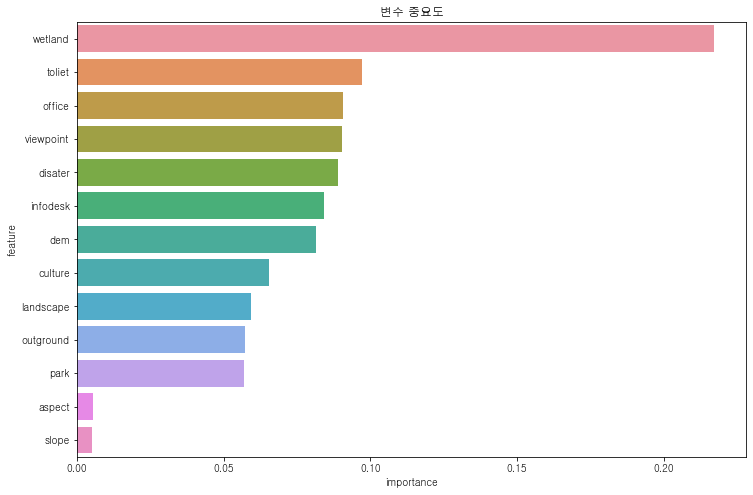

In [26]:
font_location =r'C:\\WINDOWS\\Fonts\gulim.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

plt.figure(figsize=(12, 8))
plt.title("변수 중요도")
sns.barplot(feature_impo["importance"], feature_impo["feature"])
plt.savefig("변수중요도_20211218.png", dip=300)
plt.show()

In [27]:
import graphviz
import pylab

In [28]:
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [29]:
from sklearn.tree import export_graphviz
estimator = rf_clf.estimators_[0] #or estimator=bestDecisionTree
#estimator = estimator=bestDecisionTree
export_graphviz(estimator, out_file='trail_randomtree.dot', feature_names = X_df.columns,
                class_names = ['0', '1'],
                max_depth = 5, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
                proportion = False
               )

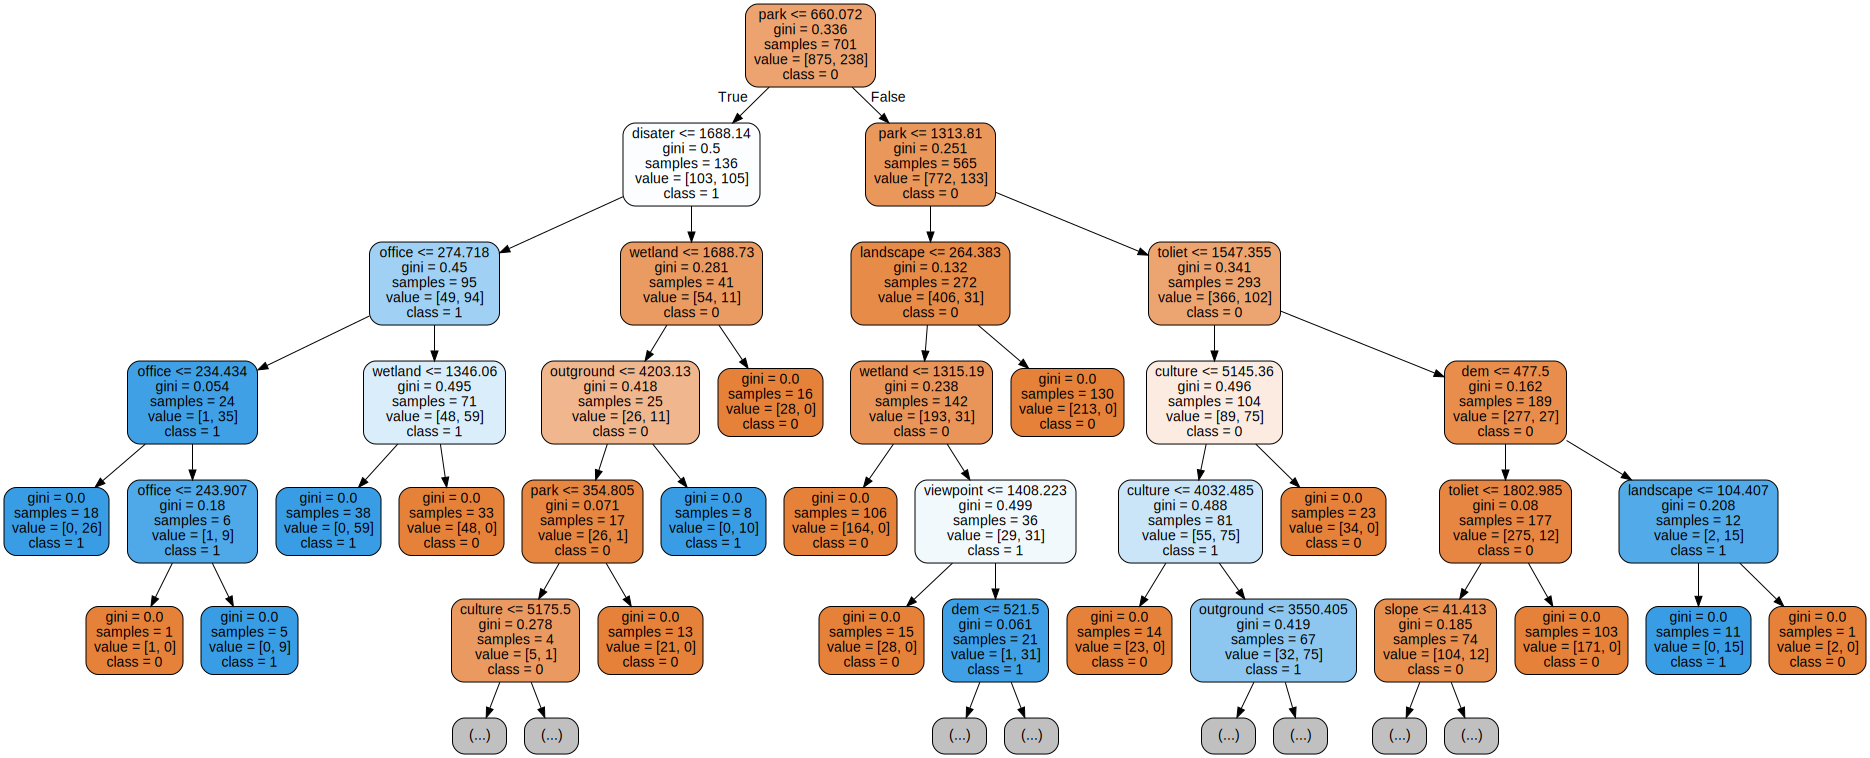

In [31]:
with open("./results/trail_randomtree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [33]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', './results/trail_randomtree.dot', '-o', './results/trail_randomtree.png', '-Gdpi=600'])

0

In [34]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'trail_randomtree.png')

# RandomForestRegressor

In [34]:
n_estimators=100

rf_rgr =RandomForestRegressor(n_estimators=n_estimators, random_state=2021)
rf_rgr.fit(X_train, y_train)
pred = rf_rgr.predict(X_test)
# accuracy = accuracy_score(y_test, pred)
print("랜덤포레스트 정확도:{0:.4f}".format(accuracy))

랜덤포레스트 정확도:0.9749


In [35]:
pred_y = rf_rgr.predict(X_test)

In [36]:
pred_y

array([0.  , 0.  , 0.  , 0.06, 1.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.98,
       0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 1.  , 0.98, 0.12,
       0.01, 0.  , 1.  , 0.  , 0.01, 0.  , 0.  , 0.55, 0.  , 0.  , 0.02,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.  , 1.  , 0.  ,
       0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.  ,
       0.  , 0.02, 0.94, 0.  , 0.  , 0.  , 0.  , 1.  , 0.98, 0.  , 0.  ,
       0.98, 1.  , 0.93, 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 1.  , 0.  , 0.  , 0.97, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       1.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.74, 0.  ,
       0.  , 0.  , 0.  , 0.98, 0.01, 0.  , 0.  , 1.  , 0.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 1.  , 0.01, 0.  , 0.99, 0.

In [37]:
os.listdir("./env14_data/")

['aspect.tfw',
 'aspect.tif',
 'aspect.tif.aux.xml',
 'aspect.tif.ovr',
 'aspect.tif.xml',
 'culturesource.tfw',
 'culturesource.tif',
 'culturesource.tif.aux.xml',
 'culturesource.tif.ovr',
 'culturesource.tif.xml',
 'dem.tfw',
 'dem.tif',
 'dem.tif.aux.xml',
 'dem.tif.ovr',
 'dem.tif.vat.cpg',
 'dem.tif.vat.dbf',
 'dem.tif.xml',
 'disater.tfw',
 'disater.tif',
 'disater.tif.aux.xml',
 'disater.tif.ovr',
 'disater.tif.xml',
 'infodesk.tfw',
 'infodesk.tif',
 'infodesk.tif.aux.xml',
 'infodesk.tif.ovr',
 'infodesk.tif.xml',
 'landscape.tfw',
 'landscape.tif',
 'landscape.tif.aux.xml',
 'landscape.tif.ovr',
 'landscape.tif.xml',
 'office.tfw',
 'office.tif',
 'office.tif.aux.xml',
 'office.tif.ovr',
 'office.tif.xml',
 'outground.tfw',
 'outground.tif',
 'outground.tif.aux.xml',
 'outground.tif.ovr',
 'outground.tif.xml',
 'park.tfw',
 'park.tif',
 'park.tif.aux.xml',
 'park.tif.ovr',
 'park.tif.xml',
 'slope.tfw',
 'slope.tif',
 'slope.tif.aux.xml',
 'slope.tif.ovr',
 'slope.tif.xml',


In [38]:
X_df.columns, len(X_df.columns)

(Index(['viewpoint', 'infodesk', 'landscape', 'office', 'outground', 'park',
        'toliet', 'disater', 'culture', 'wetland', 'dem', 'slope', 'aspect'],
       dtype='object'),
 13)

In [39]:
import glob

In [40]:
tif_list =glob.glob("./env14_data/*.tif")

In [41]:
tif_list = ['./env14_data\\aspect.tif',
 './env14_data\\culturesource.tif',
 './env14_data\\dem.tif',
 './env14_data\\disater.tif', 
 './env14_data\\infodesk.tif',
 './env14_data\\landscape.tif',
 './env14_data\\office.tif',
 './env14_data\\outground.tif',
 './env14_data\\park.tif',
 './env14_data\\slope.tif',
 './env14_data\\special_wetland.tif',
 './env14_data\\toliet.tif',
 './env14_data\\viewpoint.tif',
 ]

In [42]:
name_list = [os.path.basename(tif).split(".")[0] for tif in tif_list]
name_list

['aspect',
 'culturesource',
 'dem',
 'disater',
 'infodesk',
 'landscape',
 'office',
 'outground',
 'park',
 'slope',
 'special_wetland',
 'toliet',
 'viewpoint']

In [43]:
array_list=[]
array_list

[]

In [44]:
for index, tif in enumerate(tif_list):    
    print(index, tif)
    tif_type = gdal.Open(tif)    
    array_type = tif_type.ReadAsArray() 
    print(array_type.shape)
   # np.array(array_type)
    array_list.append(array_type)   

0 ./env14_data\aspect.tif
(1200, 1200)
1 ./env14_data\culturesource.tif
(1200, 1200)
2 ./env14_data\dem.tif
(1200, 1200)
3 ./env14_data\disater.tif
(1200, 1200)
4 ./env14_data\infodesk.tif
(1200, 1200)
5 ./env14_data\landscape.tif
(1200, 1200)
6 ./env14_data\office.tif
(1200, 1200)
7 ./env14_data\outground.tif
(1200, 1200)
8 ./env14_data\park.tif
(1200, 1200)
9 ./env14_data\slope.tif
(1200, 1200)
10 ./env14_data\special_wetland.tif
(1200, 1200)
11 ./env14_data\toliet.tif
(1200, 1200)
12 ./env14_data\viewpoint.tif
(1200, 1200)


In [45]:
array_list

[array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -1.0000000e+00,  9.0000000e+01, ...,
          9.0000000e+01, -1.0000000e+00, -3.4028235e+38],
        [-3.4028235e+38,  1.8000000e+02,  1.6156505e+02, ...,
          4.2137596e+01,  0.0000000e+00, -3.4028235e+38],
        ...,
        [-3.4028235e+38,  1.8000000e+02,  2.3903624e+02, ...,
          2.7813010e+02,  0.0000000e+00, -3.4028235e+38],
        [-3.4028235e+38, -1.0000000e+00,  2.7000000e+02, ...,
          2.7000000e+02, -1.0000000e+00, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32),
 array([[3092.9758, 3091.1487, 3089.3528, ..., 7030.2207, 7040.064 ,
         7049.9077],
        [3083.1477, 3081.3147, 3079.513 , ..., 7028.4634, 7038.3096,
         7048.156 ],
        [3073.3208, 3071.4817, 3069.6743, ..., 7026.72  , 7036.569 ,
 

In [46]:
stack_array = np.array(array_list)

In [47]:
stack_array.shape

(13, 1200, 1200)

In [48]:
rows = stack_array.shape[1]
cols = stack_array.shape[2]
bands = stack_array.shape[0]

In [49]:
data = np.stack(stack_array, axis=2)
data = data.reshape(rows*cols, bands)
raster_data = pd.DataFrame(data, columns=name_list)

In [50]:
raster_data.head()

,aspect,culturesource,dem,disater,infodesk,landscape,office,outground,park,slope,special_wetland,toliet,viewpoint
0,-3.402823e+38,3092.975830,174.0,5372.001465,3641.565674,4279.918457,3615.356201,7788.863770,3079.025879,-3.402823e+38,6420.412598,2977.549316,5735.302734
1,-3.402823e+38,3091.148682,174.0,5366.013184,3638.914795,4275.511719,3612.658203,7780.777832,3077.092773,-3.402823e+38,6414.639648,2975.785645,5731.893066
2,-3.402823e+38,3089.352783,174.0,5360.037109,3636.289307,4271.124023,3609.986084,7772.695801,3075.191162,-3.402823e+38,6408.876465,2974.054443,5728.499023
3,-3.402823e+38,3087.588135,171.0,5354.073242,3633.689697,4266.755371,3607.339844,7764.618652,3073.320801,-3.402823e+38,6403.124023,2972.355957,5725.120117
4,-3.402823e+38,3085.854736,171.0,5348.121094,3631.115479,4262.405273,3604.719238,7756.545410,3071.481689,-3.402823e+38,6397.382324,2970.690186,5721.756836


In [51]:
raster_data.columns

Index(['aspect', 'culturesource', 'dem', 'disater', 'infodesk', 'landscape',
       'office', 'outground', 'park', 'slope', 'special_wetland', 'toliet',
       'viewpoint'],
      dtype='object')

In [52]:
rf_clf_input = raster_data[['viewpoint','infodesk','landscape', 'office', 'outground',
                            'park','toliet','disater', 'culturesource', 'special_wetland','dem', 'slope', 'aspect']]

In [53]:
rf_clf_input = rf_clf_input.astype('float32')

In [54]:
rf_clf_input.head()

,viewpoint,infodesk,landscape,office,outground,park,toliet,disater,culturesource,special_wetland,dem,slope,aspect
0,5735.302734,3641.565674,4279.918457,3615.356201,7788.863770,3079.025879,2977.549316,5372.001465,3092.975830,6420.412598,174.0,-3.402823e+38,-3.402823e+38
1,5731.893066,3638.914795,4275.511719,3612.658203,7780.777832,3077.092773,2975.785645,5366.013184,3091.148682,6414.639648,174.0,-3.402823e+38,-3.402823e+38
2,5728.499023,3636.289307,4271.124023,3609.986084,7772.695801,3075.191162,2974.054443,5360.037109,3089.352783,6408.876465,174.0,-3.402823e+38,-3.402823e+38
3,5725.120117,3633.689697,4266.755371,3607.339844,7764.618652,3073.320801,2972.355957,5354.073242,3087.588135,6403.124023,171.0,-3.402823e+38,-3.402823e+38
4,5721.756836,3631.115479,4262.405273,3604.719238,7756.545410,3071.481689,2970.690186,5348.121094,3085.854736,6397.382324,171.0,-3.402823e+38,-3.402823e+38


In [55]:
os.makedirs("./results/final_data", exist_ok=True)

In [59]:
rf_clf_input.to_csv("./results/final_data/raster_df.csv", index=False)
df.to_csv("./results/final_data/model_df.csv", index=False)

In [60]:
classed_data =  rf_rgr.predict(rf_clf_input)
classed_data.shape

F:\Anaconda3\envs\tf37\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- culturesource
- special_wetland
Feature names seen at fit time, yet now missing:
- culture
- wetland

  warnings.warn(message, FutureWarning)


(1440000,)

In [61]:
classification  = classed_data.reshape(rows, cols)

In [62]:
classification.shape

(1200, 1200)

In [63]:
in_raster = "./env14_data/dem.tif"
ds = gdal.Open(in_raster, gdal.GA_ReadOnly)

In [64]:
geo_transform = ds.GetGeoTransform()
geo_transform

(215428.99559634196,
 10.000000000000098,
 0.0,
 422361.0358329377,
 0.0,
 -10.000000000000098)

In [65]:
projection = ds.GetProjectionRef()
projection

'PROJCS["GCS_Transverse_Mercator",GEOGCS["GCS_GCS",DATUM["Datum",SPHEROID["GRS80",6378137,298.2572221]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [66]:
def createGeotiff(outRaster, data, geo_transform, projection):
    # Create a GeoTIFF file with the given data
    driver = gdal.GetDriverByName('GTiff')
    data.astype('float32')
    rows, cols = data.shape
    rasterDS = driver.Create(outRaster, cols, rows, 1, gdal.GDT_Float32)
    rasterDS.SetGeoTransform(geo_transform)
    rasterDS.SetProjection(projection)
    band = rasterDS.GetRasterBand(1)
    band.WriteArray(data)
    rasterDS = None

In [67]:
#export classified image
outRaster = "./results/final_20230214.tif"
createGeotiff(outRaster,classification,geo_transform, projection)

In [68]:
classification

array([[0.54, 0.54, 0.54, ..., 0.67, 0.67, 0.67],
       [0.54, 0.54, 0.54, ..., 0.67, 0.67, 0.67],
       [0.54, 0.53, 0.53, ..., 0.67, 0.67, 0.67],
       ...,
       [0.53, 0.52, 0.42, ..., 0.58, 0.66, 0.66],
       [0.53, 0.53, 0.42, ..., 0.58, 0.66, 0.66],
       [0.53, 0.53, 0.53, ..., 0.66, 0.66, 0.66]])

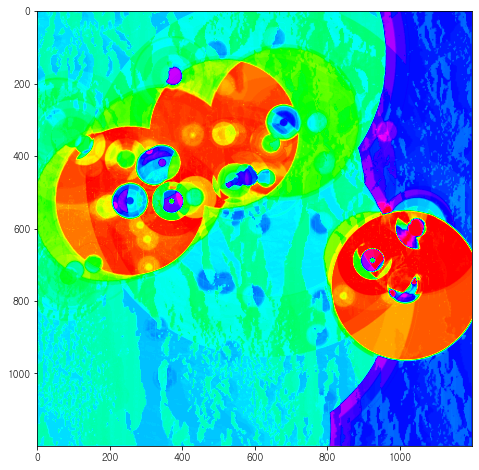

In [69]:
plt.figure(figsize=(12,8))
plt.imshow(classification, cmap="hsv")
plt.show()

In [70]:
from xgboost import XGBClassifier, XGBRegressor

In [71]:
import xgboost
xgboost.__version__

'1.5.2'

In [72]:
X_df.shape, y_df.shape

((1392, 13), (1392,))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, stratify=y_df, random_state=3)

In [74]:
evals = [(X_test, y_test)]

In [75]:
xgbmodel = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=2021, use_label_encoder=False)

In [76]:
xgbmodel

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2021, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)

In [77]:
xgbmodel.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, eval_metric="logloss", verbose=1)

[0]	validation_0-logloss:0.63200
[1]	validation_0-logloss:0.58255
[2]	validation_0-logloss:0.53423
[3]	validation_0-logloss:0.49418
[4]	validation_0-logloss:0.46034
[5]	validation_0-logloss:0.43345
[6]	validation_0-logloss:0.40900
[7]	validation_0-logloss:0.38805
[8]	validation_0-logloss:0.36283
[9]	validation_0-logloss:0.34079
[10]	validation_0-logloss:0.32174
[11]	validation_0-logloss:0.30558
[12]	validation_0-logloss:0.29272
[13]	validation_0-logloss:0.28237
[14]	validation_0-logloss:0.26878
[15]	validation_0-logloss:0.25902
[16]	validation_0-logloss:0.25082
[17]	validation_0-logloss:0.24126
[18]	validation_0-logloss:0.23559
[19]	validation_0-logloss:0.22689
[20]	validation_0-logloss:0.22047
[21]	validation_0-logloss:0.21683
[22]	validation_0-logloss:0.21334
[23]	validation_0-logloss:0.20897
[24]	validation_0-logloss:0.20536
[25]	validation_0-logloss:0.20198
[26]	validation_0-logloss:0.19546
[27]	validation_0-logloss:0.19165
[28]	validation_0-logloss:0.18868
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=24,
              num_parallel_tree=1, predictor='auto', random_state=2021,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [78]:
pred_probs = xgbmodel.predict_proba(X_test)[:, 1]
pred_probs.shape

(279,)

In [79]:
preds = xgbmodel.predict(X_test)
preds.shape

(279,)

#### 정확도 평가 함수

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    
    print("정확도: {0:.4f}, 정밀도: {1:.4f} , 재현율: {2:.4f}, F1:{3:.4f} , AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))


In [82]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[218   1]
 [  7  53]]
정확도: 0.9713, 정밀도: 0.9815 , 재현율: 0.8833, F1:0.9298 , AUC:0.9928


In [83]:
# 변수 중요도

In [84]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

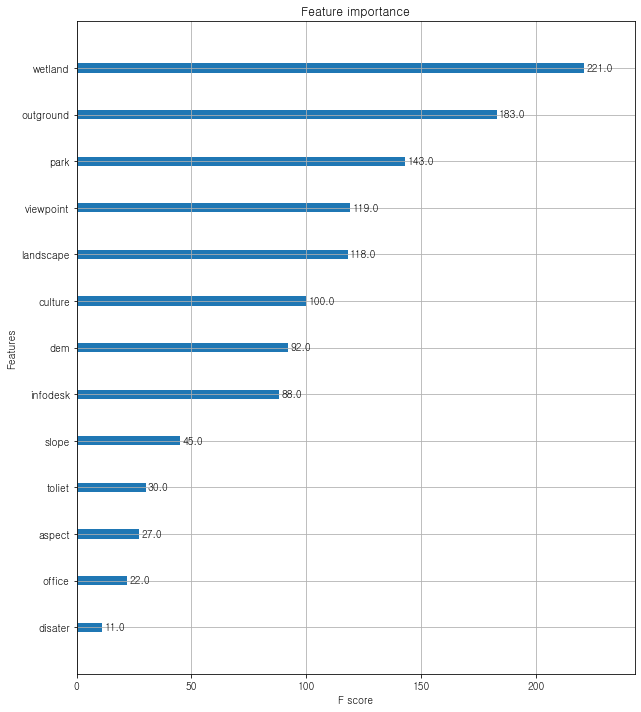

In [85]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbmodel, ax=ax)

In [86]:
# 래스터 이미지 입력 예측

In [87]:
class_xgb = xgbmodel.predict_proba(rf_clf_input)

In [88]:
class_xgb

array([[0.11745608, 0.8825439 ],
       [0.11745608, 0.8825439 ],
       [0.11745608, 0.8825439 ],
       ...,
       [0.31548083, 0.6845192 ],
       [0.31548083, 0.6845192 ],
       [0.31548083, 0.6845192 ]], dtype=float32)

In [89]:
classification_result=class_xgb[:, -1]
classification_xgb= classification_result.reshape(1200,1200)

In [90]:
#export classified image
outRaster = "./env14_data/final_xgboost_20211219.tif"
createGeotiff(outRaster,classification_xgb,geo_transform, projection)

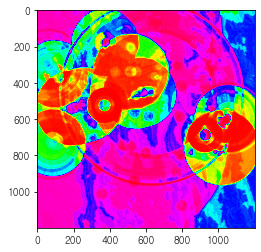

In [93]:
plt.imshow(classification_xgb, cmap='hsv')

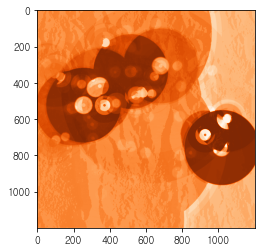

In [92]:
plt.imshow(classification, cmap='Oranges_r')

# rasterio 패키지 이용 연습

In [95]:
dem = rasterio.open(in_raster)

In [96]:
dem

<open DatasetReader name='./env14_data/dem.tif' mode='r'>

In [97]:
dem_array = dem.read(1)

In [98]:
dem_array.shape

(1200, 1200)

In [99]:
dem_flat = dem_array.flatten()

In [100]:
dem_flat.shape

(1440000,)

In [101]:
pd.DataFrame({'dem':dem_flat})

,dem
0,174
1,174
2,174
3,171
4,171
...,...
1439995,124
1439996,124
1439997,131
1439998,131


In [102]:
os.listdir('./env14_data/')

['aspect.tfw',
 'aspect.tif',
 'aspect.tif.aux.xml',
 'aspect.tif.ovr',
 'aspect.tif.xml',
 'culturesource.tfw',
 'culturesource.tif',
 'culturesource.tif.aux.xml',
 'culturesource.tif.ovr',
 'culturesource.tif.xml',
 'dem.tfw',
 'dem.tif',
 'dem.tif.aux.xml',
 'dem.tif.ovr',
 'dem.tif.vat.cpg',
 'dem.tif.vat.dbf',
 'dem.tif.xml',
 'disater.tfw',
 'disater.tif',
 'disater.tif.aux.xml',
 'disater.tif.ovr',
 'disater.tif.xml',
 'final_xgboost_20211219.tif',
 'infodesk.tfw',
 'infodesk.tif',
 'infodesk.tif.aux.xml',
 'infodesk.tif.ovr',
 'infodesk.tif.xml',
 'landscape.tfw',
 'landscape.tif',
 'landscape.tif.aux.xml',
 'landscape.tif.ovr',
 'landscape.tif.xml',
 'office.tfw',
 'office.tif',
 'office.tif.aux.xml',
 'office.tif.ovr',
 'office.tif.xml',
 'outground.tfw',
 'outground.tif',
 'outground.tif.aux.xml',
 'outground.tif.ovr',
 'outground.tif.xml',
 'park.tfw',
 'park.tif',
 'park.tif.aux.xml',
 'park.tif.ovr',
 'park.tif.xml',
 'slope.tfw',
 'slope.tif',
 'slope.tif.aux.xml',
 'slo

In [103]:
list_tif = glob.glob('./env14_data/*.tif')

field_name = []

for tif_name in list_tif:
    field_name.append(tif_name.split("\\")[-1].split(".")[-2])
    
field_name

['aspect',
 'culturesource',
 'dem',
 'disater',
 'final_xgboost_20211219',
 'infodesk',
 'landscape',
 'office',
 'outground',
 'park',
 'slope',
 'special_wetland',
 'toliet',
 'viewpoint',
 'wellpoint']

In [104]:
inVar = pd.DataFrame()

for tif in list_tif:
    tif_name = tif.split("\\")[-1].split(".")[-2]
    tif_open =rasterio.open(tif)
    print(tif_name)
    tif_data =tif_open.read(1)
    tif_flat = tif_data.flatten()
    tif_df =pd.DataFrame(tif_flat)
    inVar[tif_name] = tif_df    

aspect
culturesource
dem
disater
final_xgboost_20211219
infodesk
landscape
office
outground
park
slope
special_wetland
toliet
viewpoint
wellpoint


In [105]:
inVar.head()

,aspect,culturesource,dem,disater,final_xgboost_20211219,infodesk,landscape,office,outground,park,slope,special_wetland,toliet,viewpoint,wellpoint
0,-3.402823e+38,3092.975830,174,5372.001465,0.882544,3641.565674,4279.918457,3615.356201,7788.863770,3079.025879,-3.402823e+38,6420.412598,2977.549316,5735.302734,3.037000e+10
1,-3.402823e+38,3091.148682,174,5366.013184,0.882544,3638.914795,4275.511719,3612.658203,7780.777832,3077.092773,-3.402823e+38,6414.639648,2975.785645,5731.893066,3.037000e+10
2,-3.402823e+38,3089.352783,174,5360.037109,0.882544,3636.289307,4271.124023,3609.986084,7772.695801,3075.191162,-3.402823e+38,6408.876465,2974.054443,5728.499023,3.037000e+10
3,-3.402823e+38,3087.588135,171,5354.073242,0.892756,3633.689697,4266.755371,3607.339844,7764.618652,3073.320801,-3.402823e+38,6403.124023,2972.355957,5725.120117,3.037000e+10
4,-3.402823e+38,3085.854736,171,5348.121094,0.892756,3631.115479,4262.405273,3604.719238,7756.545410,3071.481689,-3.402823e+38,6397.382324,2970.690186,5721.756836,3.037000e+10


In [106]:
inVar.shape

(1440000, 15)

In [107]:
inVar = inVar.iloc[:, :-1]

In [108]:
inVar.shape

(1440000, 14)

In [109]:
inVar.head()

,aspect,culturesource,dem,disater,final_xgboost_20211219,infodesk,landscape,office,outground,park,slope,special_wetland,toliet,viewpoint
0,-3.402823e+38,3092.975830,174,5372.001465,0.882544,3641.565674,4279.918457,3615.356201,7788.863770,3079.025879,-3.402823e+38,6420.412598,2977.549316,5735.302734
1,-3.402823e+38,3091.148682,174,5366.013184,0.882544,3638.914795,4275.511719,3612.658203,7780.777832,3077.092773,-3.402823e+38,6414.639648,2975.785645,5731.893066
2,-3.402823e+38,3089.352783,174,5360.037109,0.882544,3636.289307,4271.124023,3609.986084,7772.695801,3075.191162,-3.402823e+38,6408.876465,2974.054443,5728.499023
3,-3.402823e+38,3087.588135,171,5354.073242,0.892756,3633.689697,4266.755371,3607.339844,7764.618652,3073.320801,-3.402823e+38,6403.124023,2972.355957,5725.120117
4,-3.402823e+38,3085.854736,171,5348.121094,0.892756,3631.115479,4262.405273,3604.719238,7756.545410,3071.481689,-3.402823e+38,6397.382324,2970.690186,5721.756836


In [110]:
inVar.rename(columns ={'culturesource':'culture', 'special_wetland':'wetland'}, inplace=True)

In [112]:
inVar= inVar.drop("final_xgboost_20211219", axis=1)

In [114]:
inVar.shape

(1440000, 13)

In [115]:
dem.read_transform()

[215428.99559634196,
 10.000000000000098,
 0.0,
 422361.0358329377,
 0.0,
 -10.000000000000098]

In [116]:
(215428.99559634196,
 10.000000000000098,
 0.0,
 422361.0358329377,
 0.0,
 -10.000000000000098)

(215428.99559634196,
 10.000000000000098,
 0.0,
 422361.0358329377,
 0.0,
 -10.000000000000098)

In [117]:
dem.crs.wkt

'PROJCS["GCS_Transverse_Mercator",GEOGCS["GCS_GCS",DATUM["Datum",SPHEROID["GRS80",6378137,298.2572221]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [118]:
'PROJCS["GCS_Transverse_Mercator",GEOGCS["GCS_GCS",DATUM["Datum",SPHEROID["GRS80",6378137,298.2572221]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

'PROJCS["GCS_Transverse_Mercator",GEOGCS["GCS_GCS",DATUM["Datum",SPHEROID["GRS80",6378137,298.2572221]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [119]:
# Write the product as a raster band to a new 8-bit file. For
# the new file's profile, we start with the meta attributes of
# the source file, but then change the band count to 1, set the
# dtype to uint8, and specify LZW compression.
profile = dem.profile
print(profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1200, 'height': 1200, 'count': 1, 'crs': CRS.from_wkt('PROJCS["GCS_Transverse_Mercator",GEOGCS["GCS_GCS",DATUM["Datum",SPHEROID["GRS80",6378137,298.2572221]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(10.000000000000098, 0.0, 215428.99559634196,
       0.0, -10.000000000000098, 422361.0358329377), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}


In [273]:
profile.update(dtype=rasterio.float32, count=1, compress='lzw')

In [274]:
with rasterio.open('example-total.tif', 'w', **profile) as dst:
    dst.write(classification.astype(rasterio.float32), 1)

In [271]:
classification.shape

(1200, 1200)

In [272]:
type(classification)

numpy.ndarray